In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load data

In [10]:
metadata_df = pd.read_csv('download_imgs/selected_points.csv', index_col=0)

In [11]:
indicators_pp2 = ['safe', 'lively', 'wealthy','beautiful', 'boring', 'depressing']
num_indicators_pp2 = len(indicators_pp2)

# PlacePulse2.0 inferences

We use the same [model](https://github.com/ualsg/global-streetscapes/blob/main/code/model_training/perception/inference.py) used in the [Global Streetscapes dataset](https://github.com/ualsg/global-streetscapes/wiki/4b-Human-perception).

Run the next cells after having run `8_inference.py` as indicated in the `README.MD` file

In [12]:
folder_path = 'global-streetscapes/labels'
for i, ind in enumerate(indicators_pp2):
    if i == 0:
        df_pp2 = pd.read_csv(f'{folder_path}/{ind}.csv')
    else:
        df_pp2 = pd.merge(df_pp2, pd.read_csv(f'{folder_path}/{ind}.csv'), on='uuid', how='left')

df_pp2

,uuid,safe,lively,wealthy,beautiful,boring,depressing
0,59a3e1af-d309-4aa1-94ba-6484df00630d,3.31,9.28,6.92,6.54,1.61,3.88
1,872f6fcf-4737-45db-a168-73f67886a1e0,6.98,5.95,6.14,6.64,3.64,2.33
2,c74b410d-dcd0-49d7-87a3-359703d04227,5.81,4.09,5.90,9.22,0.56,5.31
3,e249dc45-21d5-4a04-8dd9-800a33867181,4.15,2.69,1.52,9.43,6.92,7.05
4,b6b35546-c721-4af5-af4a-1212c59dd629,3.89,8.95,7.96,7.27,0.59,1.62
...,...,...,...,...,...,...,...
837,79fda995-eca4-4b51-85e2-ad2a5b238a99,2.55,5.95,2.86,5.47,4.50,2.20
838,dcd7b5ab-53cf-415c-b6cc-0559c77fe83f,2.53,6.06,5.42,5.34,4.39,2.42
839,cc396f01-0332-48d6-84d9-78ddb450af17,4.52,9.65,7.99,3.86,1.38,2.04
840,81b458f1-f0f1-42d7-acb2-53eeda134c6a,0.76,5.23,4.33,8.13,3.31,2.79


# Merge SVIs with city of origin

In [22]:
metadata_df = pd.read_csv('global-streetscapes/data/simplemaps.csv', low_memory=False)
metadata_df
merged_df = pd.merge(df_pp2, metadata_df, on='uuid', how='left')
merged_df

,uuid,safe,lively,wealthy,beautiful,boring,depressing,source,orig_id,city,...,city_id,city_lat,city_lon,country,iso2,iso3,admin_name,capital,population,continent
0,59a3e1af-d309-4aa1-94ba-6484df00630d,3.31,9.28,6.92,6.54,1.61,3.88,Mapillary,112210070930049,Singapore,...,1702341327,1.3000,103.8000,Singapore,SG,SGP,Central Singapore,primary,5271000.0,Asia
1,872f6fcf-4737-45db-a168-73f67886a1e0,6.98,5.95,6.14,6.64,3.64,2.33,Mapillary,298768091745332,Singapore,...,1702341327,1.3000,103.8000,Singapore,SG,SGP,Central Singapore,primary,5271000.0,Asia
2,c74b410d-dcd0-49d7-87a3-359703d04227,5.81,4.09,5.90,9.22,0.56,5.31,Mapillary,465024381451128,Singapore,...,1702341327,1.3000,103.8000,Singapore,SG,SGP,Central Singapore,primary,5271000.0,Asia
3,e249dc45-21d5-4a04-8dd9-800a33867181,4.15,2.69,1.52,9.43,6.92,7.05,KartaView,371237025,Singapore,...,1702341327,1.3000,103.8000,Singapore,SG,SGP,Central Singapore,primary,5271000.0,Asia
4,b6b35546-c721-4af5-af4a-1212c59dd629,3.89,8.95,7.96,7.27,0.59,1.62,Mapillary,530549201661479,Singapore,...,1702341327,1.3000,103.8000,Singapore,SG,SGP,Central Singapore,primary,5271000.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,79fda995-eca4-4b51-85e2-ad2a5b238a99,2.55,5.95,2.86,5.47,4.50,2.20,Mapillary,303884517912485,Zürich,...,1756539143,47.3744,8.5411,Switzerland,CH,CHE,Zürich,admin,434008.0,Europe
838,dcd7b5ab-53cf-415c-b6cc-0559c77fe83f,2.53,6.06,5.42,5.34,4.39,2.42,Mapillary,301690654751016,Singapore,...,1702341327,1.3000,103.8000,Singapore,SG,SGP,Central Singapore,primary,5271000.0,Asia
839,cc396f01-0332-48d6-84d9-78ddb450af17,4.52,9.65,7.99,3.86,1.38,2.04,Mapillary,1468130456863289,Zürich,...,1756539143,47.3744,8.5411,Switzerland,CH,CHE,Zürich,admin,434008.0,Europe
840,81b458f1-f0f1-42d7-acb2-53eeda134c6a,0.76,5.23,4.33,8.13,3.31,2.79,Mapillary,175346777816683,Singapore,...,1702341327,1.3000,103.8000,Singapore,SG,SGP,Central Singapore,primary,5271000.0,Asia


# Scores for all SVIs by raters of each country + PP2 model (global)

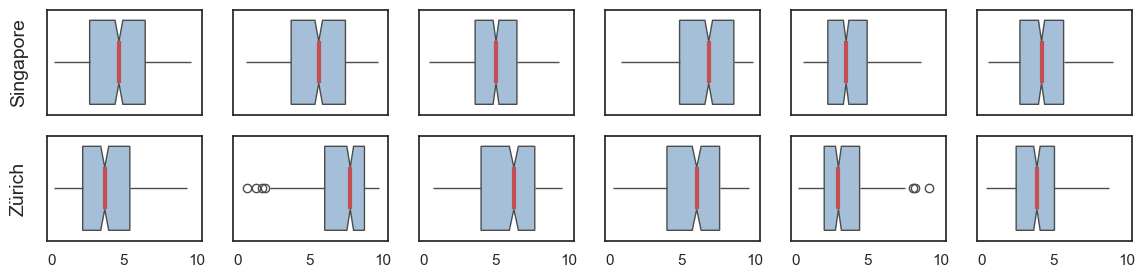

In [27]:
cities = merged_df['city'].unique()

fig, axes = plt.subplots(
    len(cities), num_indicators_pp2, figsize=(14, 3), sharey=True, sharex=True
)

sns.set(style="white")
fontsize = 14
plot_args = {
    'notch': True, 
    'showcaps': False,
    'boxprops': {"facecolor": (.3, .5, .7, .5)},
    'medianprops': {"color": "r", "linewidth": 3}
}

# Plot the remaining rows of boxplots and add vertical lines
for j, c in enumerate(cities):
    city_df = merged_df[merged_df['city'] == c]
    for i, ind in enumerate(indicators_pp2):
        # Filter by indicator
        ind_df = city_df[ind]
    
        ax = axes[j, i]  # Use the shared axes
    
        sns.boxplot(
            x=ind_df,
            ax=ax,
            **plot_args,
        )
    
        ax.set_xlabel("")
        ax.set_ylabel(c, size=fontsize)

plt.savefig("perception_comparisons.png", dpi=300)